In [2]:
pip install -U scikit-learn

  Using cached scikit_learn-1.2.2-cp39-cp39-macosx_10_9_x86_64.whl (9.1 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 3.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/kushshah/opt/anaconda3/lib/python3.9/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pickle
import pandas as pd
df = pd.read_csv("finaldata.csv")
df = df.drop("Unnamed: 0", axis = 1)
accc = {}

In [2]:
df.head()

,countryfreq,categoryfreq,investmentaffinity,fundingaffinity,milestones,timeinmilestone,relationships,outcome
0,0.578086,0.058896,0.0,0.0,0,-1.0,0,0
1,0.578086,0.058896,0.0,0.0,2,533.0,4,0
2,0.578086,0.058896,0.0,0.0,1,0.0,2,0
3,0.578086,0.058896,0.0,0.0,0,-1.0,0,0
4,0.081206,0.058896,0.0,0.0,0,-1.0,13,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63951 entries, 0 to 63950
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   countryfreq         63951 non-null  float64
 1   categoryfreq        63951 non-null  float64
 2   investmentaffinity  63951 non-null  float64
 3   fundingaffinity     63951 non-null  float64
 4   milestones          63951 non-null  int64  
 5   timeinmilestone     63951 non-null  float64
 6   relationships       63951 non-null  int64  
 7   outcome             63951 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 3.9 MB


In [4]:
df.describe()

,countryfreq,categoryfreq,investmentaffinity,fundingaffinity,milestones,timeinmilestone,relationships,outcome
count,63951.000000,63951.000000,63951.000000,6.395100e+04,63951.000000,63951.000000,63951.000000,63951.000000
mean,0.347076,0.077893,0.000001,1.263011e+04,0.780082,883.011580,3.351503,0.070460
std,0.271022,0.058322,0.000210,6.574808e+05,0.891986,2462.624493,11.679147,0.255923
min,0.000016,0.000343,0.000000,0.000000e+00,0.000000,-1.000000,0.000000,0.000000
25%,0.022154,0.039566,0.000000,0.000000e+00,0.000000,-1.000000,1.000000,0.000000
50%,0.578086,0.061470,0.000000,0.000000e+00,1.000000,0.000000,2.000000,0.000000
75%,0.578086,0.125671,0.000000,0.000000e+00,1.000000,730.000000,4.000000,0.000000
max,0.578086,0.179138,0.049787,1.112000e+08,9.000000,40452.993866,1189.000000,1.000000


In [5]:
#items to be scaled : funding affinity timeinmilestone, relationships

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df2 = df

In [8]:
df2[["fundingaffinity","timeinmilestone","relationships"]] = scaler.fit_transform(df2[["fundingaffinity","timeinmilestone","relationships"]])

In [9]:
df2.head()

,countryfreq,categoryfreq,investmentaffinity,fundingaffinity,milestones,timeinmilestone,relationships,outcome
0,0.578086,0.058896,0.0,0.0,0,0.000000,0.000000,0
1,0.578086,0.058896,0.0,0.0,2,0.013200,0.003364,0
2,0.578086,0.058896,0.0,0.0,1,0.000025,0.001682,0
3,0.578086,0.058896,0.0,0.0,0,0.000000,0.000000,0
4,0.081206,0.058896,0.0,0.0,0,0.000000,0.010934,0


In [10]:
df2.describe()

,countryfreq,categoryfreq,investmentaffinity,fundingaffinity,milestones,timeinmilestone,relationships,outcome
count,63951.000000,63951.000000,63951.000000,63951.000000,63951.000000,63951.000000,63951.000000,63951.000000
mean,0.347076,0.077893,0.000001,0.000114,0.780082,0.021852,0.002819,0.070460
std,0.271022,0.058322,0.000210,0.005913,0.891986,0.060875,0.009823,0.255923
min,0.000016,0.000343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022154,0.039566,0.000000,0.000000,0.000000,0.000000,0.000841,0.000000
50%,0.578086,0.061470,0.000000,0.000000,1.000000,0.000025,0.001682,0.000000
75%,0.578086,0.125671,0.000000,0.000000,1.000000,0.018070,0.003364,0.000000
max,0.578086,0.179138,0.049787,1.000000,9.000000,1.000000,1.000000,1.000000


In [31]:
df["outcome"].value_counts()

0    59445
1     4506
Name: outcome, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('outcome', axis=1), df['outcome'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)


In [37]:
oversampled["outcome"].value_counts()

0    59445
1    59445
Name: outcome, dtype: int64

In [41]:
features = ["countryfreq","categoryfreq","investmentaffinity","fundingaffinity","milestones","timeinmilestone","relationships"]
x = oversampled[features]
y = oversampled.outcome

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.35, random_state = 7)

KeyError: 'outcome'

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 7)
logreg.fit(x_train.values,y_train.values)
y_pred = logreg.predict(x_test.values)
print(y_pred)
# print(type(x_test.values))
# x_test.head()
# print(x_test.values)

[1 1 0 ... 0 1 1]


In [44]:
from joblib import dump, load
dump(logreg, 'lrmodel.joblib')

['lrmodel.joblib']

In [45]:
pickle.dump(logreg, open('lrmodel.pkl','wb'))

In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15125,  5764],
       [ 8720, 12003]])

<AxesSubplot:>

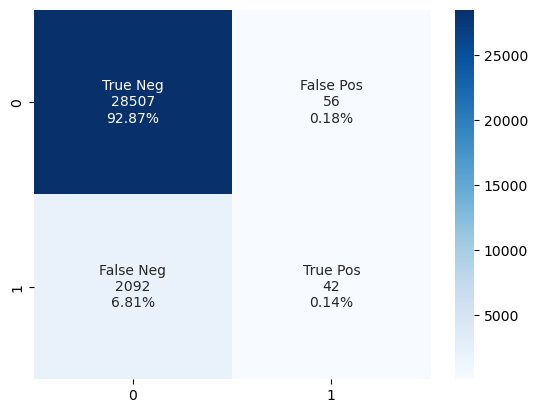

In [17]:
import seaborn as sns
import numpy as np

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt="", cmap='Blues')

In [47]:
from sklearn.metrics import classification_report
target_names = ['Failure', 'Sucess']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Failure       0.63      0.72      0.68     20889
      Sucess       0.68      0.58      0.62     20723

    accuracy                           0.65     41612
   macro avg       0.65      0.65      0.65     41612
weighted avg       0.65      0.65      0.65     41612



In [48]:
acclr = metrics.accuracy_score(y_test, y_pred)
accc["logistic regression"] = acclr


In [49]:

from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

y_proba = logreg.predict_proba(x_test)
pscore = roc_auc_score(y_test, y_proba[:,-1])
print(f"ROC PRO AUC: {pscore:.4f}")

ROC AUC: 0.6516
ROC PRO AUC: 0.7129


/Users/kushshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


NameError: name 'plt' is not defined

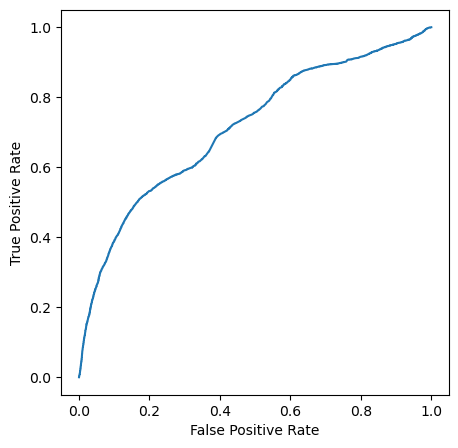

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)


In [22]:
#linear svm
from sklearn import svm
svmc = svm.SVC(probability=True)
svmc.fit(x_train,y_train)
svmcy_pred = svmc.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, svmcy_pred))
accc["SVM"] = metrics.accuracy_score(y_test, svmcy_pred)

In [ ]:
cnf_matrixsvm = metrics.confusion_matrix(y_test, svmcy_pred)
cnf_matrixsvm

In [ ]:
print(classification_report(y_test, svmcy_pred))

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrixsvm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrixsvm.flatten()/np.sum(cnf_matrixsvm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrixsvm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, svmcy_pred)
print(f"ROC AUC: {score:.4f}")

svmcy_proba = svmc.predict_proba(x_test)
svmcpscore = roc_auc_score(y_test, svmcy_proba[:,-1])
print(f"ROC PRO AUC: {svmcpscore:.4f}")

In [ ]:
plot_sklearn_roc_curve(y_test, svmcy_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, svmcy_pred)


In [ ]:
#applying random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rfy_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, rfy_pred)
print("Accuracy:", accuracy)

In [ ]:
cnf_matrixrf = metrics.confusion_matrix(y_test, rfy_pred)
cnf_matrixrf

In [ ]:
print(classification_report(y_test, rfy_pred))
accc["Random Forest"] = metrics.accuracy_score(y_test, rfy_pred)

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrixrf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrixrf.flatten()/np.sum(cnf_matrixrf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrixrf, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, rfy_pred)
print(f"ROC AUC: {score:.4f}")


rfy_proba = rf.predict_proba(x_test)
rfpscore = roc_auc_score(y_test, rfy_proba[:,-1])
print(f"ROC PRO AUC: {rfpscore:.4f}")

In [ ]:
plot_sklearn_roc_curve(y_test, rfy_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, rfy_pred)


In [ ]:
#Naiye Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbmodel = nbclassifier.fit(x_train, y_train)
nby_pred = nbclassifier.predict(x_test)
print("Accuracy of our classifier is:", accuracy_score(y_test, nby_pred) *100)

In [ ]:
cnf_matrixnb = metrics.confusion_matrix(y_test, nby_pred)
cnf_matrixnb

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrixnb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrixnb.flatten()/np.sum(cnf_matrixnb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrixnb, annot=labels, fmt="", cmap='Blues')

In [ ]:

from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, nby_pred)
print(f"ROC AUC: {score:.4f}")

nby_proba = nbmodel.predict_proba(x_test)
nbpscore = roc_auc_score(y_test, nby_proba[:,-1])
print(f"ROC PRO AUC: {nbpscore:.4f}")

In [ ]:
plot_sklearn_roc_curve(y_test, nby_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)


In [ ]:
accc["NaiveBayes"] = metrics.accuracy_score(y_test, nby_pred)

In [ ]:
print(accc)
df = pd.DataFrame(data=accc, index=[0])
df = (df.T)

print (df)

df.to_excel('dict1.xlsx')

In [ ]:
keys = list(accc.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(accc[k]) for k in keys]
sns.barplot(x=keys, y=vals)